# Cross validation to find optimal features

1. For tackle rating
2. For raid rating

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from numpy import array
from numpy import argmax
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets, linear_model, metrics 
#from sklearn.cross_validation import cross_val_score
import pickle
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [5]:
X = pd.read_csv("playfinal.csv")
print(X.shape)
numcols = X.select_dtypes(include =['int64','float64'])
print(numcols.columns)
X = X[numcols.columns]
Y1 = X['raidrating']
Y2 = X['tacklerating']
X.drop(['raidrating','tacklerating','year'],axis=1,inplace=True)

test = pd.read_csv("predictfinal.csv") 
playname=test.name
numcols = test.select_dtypes(include =['int64','float64'])
test = test[numcols.columns]
Y1test = test['raidrating']
Y2test = test['tacklerating']
test.drop(['raidrating','tacklerating'],axis=1,inplace=True)

(408, 25)
Index(['Unnamed: 0', 'Matchplayed', 'tpoints', 'mostpoints', 'notout',
       'traids', 'successraidspercent', 'noofsuperraids', 'super10',
       'traidpoints', 'avgraidpointspermatch', 'supertackle', 'high5s',
       'totaltacklepoints', 'avgtackperm', 'totaltackle', 'totalstrike',
       'year', 'successtackles', 'successtacklepercent', 'successfulraid',
       'raidrating', 'tacklerating'],
      dtype='object')


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.6s finished
G:\samsung\pyth\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.0s finished
G:\samsung\pyth\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


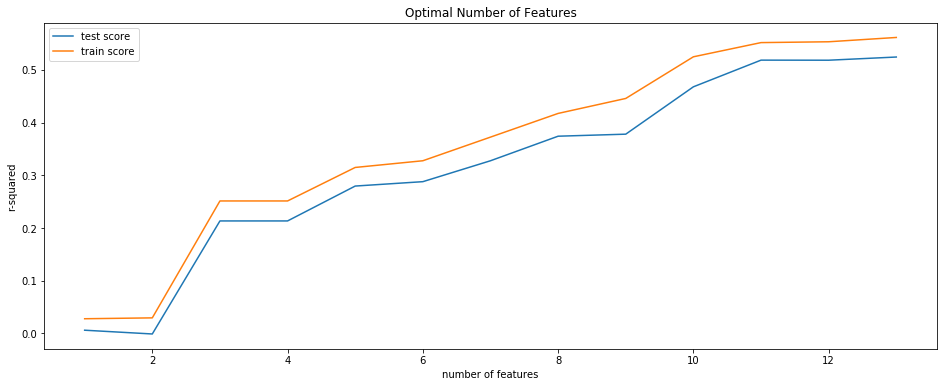

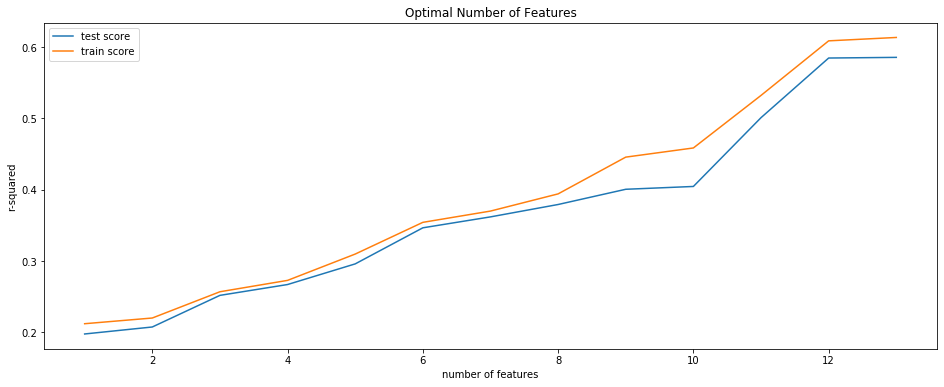

In [6]:
# step-1: create a cross-validation scheme
X_train = X
y_train = Y2
X_test = test
y_test = Y2test
 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')




X_train = X
y_train = Y1
X_test = test
y_test = Y1test
 

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')